## Soluzione:

Parallelizzare un codice significa suddividere il compito principale in sotto-problemi che possono essere risolti simultaneamente, sfruttando processori diversi allo stesso tempo. Questa tecnica consente di utilizzare meglio le risorse computazionali (ad esempio possiamo usare diversi processori economici invece di una singola CPU all'avanguardia e costosa) e di ridurre considerevolmente il tempo di esecuzione.

Il calcolo parallelo può essere realizzato in diversi modi, a seconda del numero di flussi di istruzioni e di accessi in memoria, che possono essere singoli o multipli. In questo esercizio è stato adottato l’approccio SPMD (Single Program Multiple Data), in cui lo stesso eseguibile viene lanciato su più processori, ciascuno dei quali lavora su un insieme di dati diverso, e tutti i processi comunicano tra loro attraverso un buffer condiviso. Per implementare questo tipo di approccio ho utilizzato la libreria MPI (Message Passing Interface), che mette a disposizione diverse funzioni utili elencate e spiegate qui sotto:

`MPI_Init(int *argc, char **argv)`: inizializza i processi paralleli, quindi deve essere chiamata prima di ogni altra istruzione MPI. Riceve come input gli argomenti da riga di comando, imposta il numero di processi desiderati e li collega tramite il comunicatore `MPI_COMM_WORLD`.

`MPI_Finalize()`: termina tutti i processi paralleli. Non è sicuro eseguire alcuna istruzione MPI prima di `MPI_Init()` o dopo `MPI_Finalize()`.

`MPI_Comm_size(MPI_Comm comm, int *size)`: inizializza la variabile `size`, che rappresenta il numero totale di processi paralleli. Una volta chiamata, ogni processo diventa "consapevole" del numero totale di processi nel comunicatore.

`MPI_Comm_rank(MPI_Comm comm, int *rank)`: assegna a ogni processo un `rank`, ovvero un identificativo univoco all’interno del comunicatore. Quando viene chiamata, ogni processo ottiene un nome distinto.

`MPI_Send(void *buffer, int n, MPI_Datatype datatype, int target, int tag, MPI_Comm comm)`: invia `n` elementi di tipo `datatype` dal processo corrente al processo `target` nel comunicatore `comm`, usando `tag` come etichetta per il messaggio. I dati da inviare devono essere passati come puntatore.

`MPI_Recv(void *buffer, int n, MPI_Datatype datatype, int target, int tag, MPI_Comm comm, MPI_Status *status)`: riceve `n` elementi di tipo `datatype` dal processo `target` nel comunicatore `comm`, usando `tag` come etichetta e `status` per ricevere informazioni sul messaggio. Anche qui i dati sono passati come puntatore.

`MPI_Bcast(void *buffer, int n, MPI_Datatype datatype, int root, MPI_Comm comm)`: trasmette `n` elementi di tipo `datatype` dal processo `root` a tutti gli altri processi nel comunicatore `comm`. I dati trasmessi sono passati come puntatore.

`MPI_Gather(void *sendbuf, int n_send, MPI_Datatype sendtype, void *recvbuf, int n_recv, MPI_Datatype recvtype, int root, MPI_Comm comm)`: raccoglie `n_send` elementi di tipo `sendtype` da tutti i processi e li invia al processo `root`, che riceve `n_recv` elementi di tipo `recvtype`. Tutti i dati vanno passati come puntatori.

`MPI_Reduce(void *sendbuf, void *recvbuf, int n, MPI_Datatype datatype, MPI_Op op, int root, MPI_Comm comm)`: riduce `n` elementi di tipo `datatype` da tutti i processi in un unico risultato nel processo `root`, applicando un'operazione `op` come somma, minimo, massimo, ecc.

`MPI_Barrier()`: forza tutti i processi ad attendere che tutti gli altri abbiano raggiunto lo stesso punto. È utile ad esempio prima di chiamare `MPI_Gather()` per evitare la raccolta di dati ancora non elaborati.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
path0 = pd.read_csv("OUTPUT/core0/path_0.out" ,delim_whitespace=True)
path3000 = pd.read_csv( "OUTPUT/core0/path_3000.out" ,delim_whitespace=True)
path7000 = pd.read_csv( "OUTPUT/core0/path_7000.out" ,delim_whitespace=True)

path10000 = pd.read_csv( "OUTPUT/core0/path_10000.out" ,delim_whitespace=True)

           X        Y  city_id
0    13.5747  37.3123        1
1    15.0874  37.5024       24
2    15.8216  40.5173       76
3    10.9360  44.5385       58
4    16.3331  39.5967       28
..       ...      ...      ...
105  16.0987  38.6267      108
106  10.8687  43.9741       74
107  16.4736  40.4476       55
108  13.1509  43.1530       52
109  13.6388  43.0922       33

[110 rows x 3 columns]


/tmp/ipykernel_9778/201628398.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path ,delim_whitespace=True)
/tmp/ipykernel_9778/201628398.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df500 = pd.read_csv(path500 ,delim_whitespace=True)


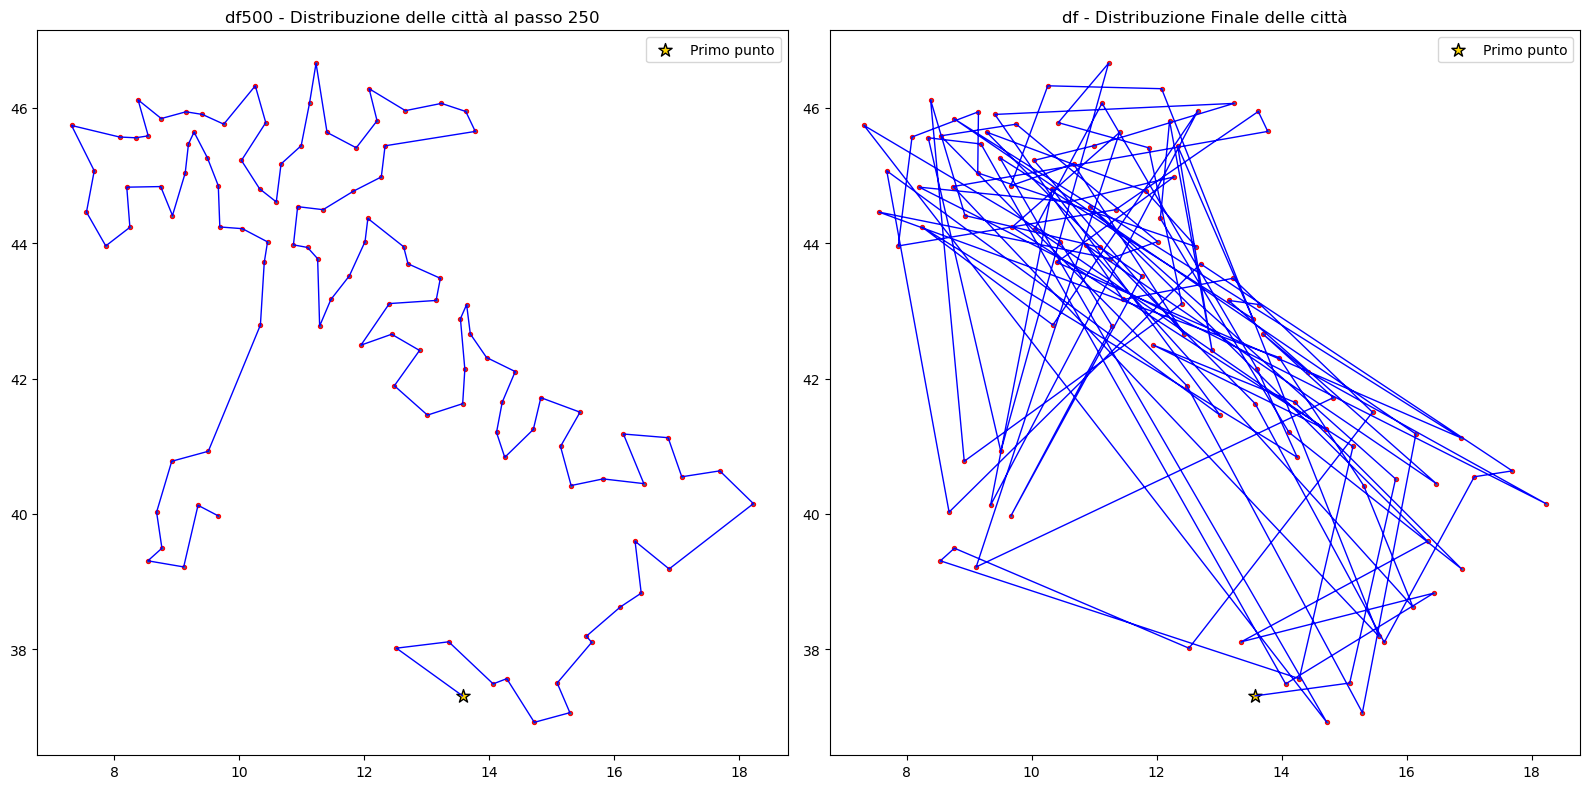

In [ ]:
path0 = pd.read_csv("OUTPUT/core0/path_0.out" ,delim_whitespace=True)
path3000 = pd.read_csv( "OUTPUT/core0/path_3000.out" ,delim_whitespace=True)
path7000 = pd.read_csv( "OUTPUT/core0/path_7000.out" ,delim_whitespace=True)

path10000 = pd.read_csv( "OUTPUT/core0/path_10000.out" ,delim_whitespace=True)

fig, axes = plt.subplots(2, 2, figsize=(16, 8))  # 1 riga, 2 colonne

# --- Primo subplot: df ---
axes[1].scatter(df['X'], df['Y'], s=8, edgecolor='r')
axes[1].plot(df['X'], df['Y'], color='blue', linewidth=1)
idx1 = df.index[df['city_id'] == 1][0]
axes[1].scatter(df.loc[idx1, 'X'], df.loc[idx1, 'Y'],
                color='gold', edgecolor='black', s=100, marker='*', label='Primo punto')
axes[1].set_title("df - Distribuzione Finale delle città")
axes[1].legend()

# --- Secondo subplot: df500 ---
axes[0].scatter(df500['X'], df500['Y'], s=8, edgecolor='r')
axes[0].plot(df500['X'], df500['Y'], color='blue', linewidth=1)
idx2 = df500.index[df500['city_id'] == 1][0]
axes[0].scatter(df500.loc[idx2, 'X'], df500.loc[idx2, 'Y'],
                color='gold', edgecolor='black', s=100, marker='*', label='Primo punto')
axes[0].set_title("df500 - Distribuzione delle città al passo 250")
axes[0].legend()

plt.tight_layout()
plt.show()

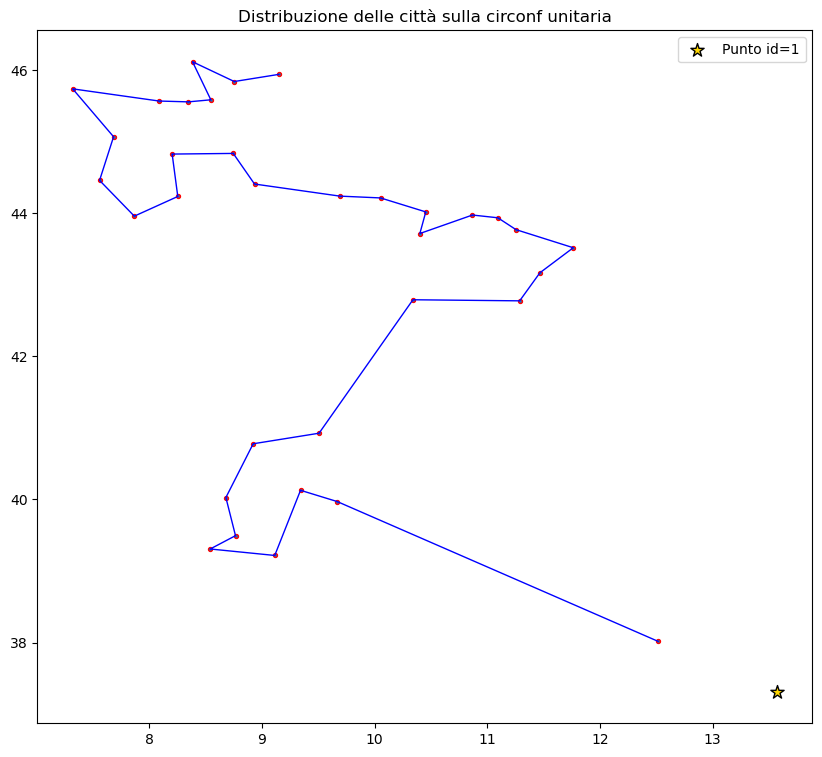

In [4]:
pt = df[df['city_id'] == 1]
plt.figure(figsize=(10,9))
plt.scatter(pt['X'], pt['Y'],
            color='gold', edgecolor='black',
            s=100, marker='*', label='Punto id=1')
plt.legend()


plt.scatter(df['X'].tail(34), df['Y'].tail(34), s = 8, edgecolor = 'r' )
plt.plot(df['X'].tail(34), df['Y'].tail(34), color='blue', linewidth=1)

plt.title("Distribuzione delle città sulla circonf unitaria")
plt.show()